# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [47]:
#Import important capabilities. 

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
print(os.getcwd())


C:\Users\CONNELL_HARR.R9034P30\Documents\DSI-Assignments\project-1\code


In [48]:
df_act=pd.read_csv('../data/act.csv')
df_sat=pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [49]:
(df_act.head(10))


,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [50]:
(df_sat.head(10))

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [51]:
df_sat['Math'][20] = 524
df_act['Science'][21] = 23.2
#Some of the data was wrong so it needed some updating/ correction. 

#https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
#^updated data. there was a mistake that needed to be fixed. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### 3. Describe in words what each variable (column) is.

In [52]:
#Variables for ACT.
#State is the state the data is taken in/ the participants are located in. 
#English is the avg english score per state. 
#Math is the avg math score per state. 
#reading is the avg reading score per state. 
#science is the avg science score per state. 
#composite is an accumulation between scores put together as a whole and is the average per state of the composites.
#participation is the average particpation per state

In [53]:
#Variables for the SAT
#State is the state the tests occured in/ where the students are located. 
#Particpation is the % of students who take the test. 
#Evidence based reading and writing is the average score for the state's students. 
#Math is the average score for math for the state's students. 
#Total is an accumulatoin of both math and writing/reading.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [198]:
#The participation rates do not entirely make sense. It is hard to understand exactly what it is 100% of because there is no 
#realistic way that it is 100% of the student population. 

##### 5. Print the types of each column.

In [55]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [56]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [57]:
#Yes the participation rates do. They are in % and currently are a string when they are more effective if they are a float. 

In [58]:
df_sat['Participation'] =  df_sat['Participation'].map(lambda participation_cell: participation_cell.replace('%','').replace('\'', ''))
#removing the % and converting the string into a float so that the number can be used more effectively. 

In [59]:
df_sat['Participation']=df_sat['Participation'].astype(float)/100
#putting it over 100 so that it properly aligns with %'s rather than are just numbers.'

In [60]:
df_sat['Participation']
   

0     0.05
1     0.38
2     0.30
3     0.03
4     0.53
5     0.11
6     1.00
7     1.00
8     1.00
9     0.83
10    0.61
11    0.55
12    0.93
13    0.09
14    0.63
15    0.02
16    0.04
17    0.04
18    0.04
19    0.95
20    0.69
21    0.76
22    1.00
23    0.03
24    0.02
25    0.03
26    0.10
27    0.03
28    0.26
29    0.96
30    0.70
31    0.11
32    0.67
33    0.49
34    0.02
35    0.12
36    0.07
37    0.43
38    0.65
39    0.71
40    0.50
41    0.03
42    0.05
43    0.62
44    0.03
45    0.60
46    0.65
47    0.64
48    0.14
49    0.03
50    0.03
Name: Participation, dtype: float64

In [61]:
df_sat

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,0.05,593,572,1165
1,1,Alaska,0.38,547,533,1080
2,2,Arizona,0.30,563,553,1116
3,3,Arkansas,0.03,614,594,1208
4,4,California,0.53,531,524,1055
5,5,Colorado,0.11,606,595,1201
6,6,Connecticut,1.00,530,512,1041
7,7,Delaware,1.00,503,492,996
8,8,District of Columbia,1.00,482,468,950
9,9,Florida,0.83,520,497,1017


In [62]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [63]:
#perform exact steps on act participation as were done on SAT
#remove %'s so that it is not a float
df_act['Participation'] =  df_act['Participation'].map(lambda participation_cell: participation_cell.replace('%','').replace('\'', ''))

In [64]:
#divide by 100 so that they align with % better.
df_act['Participation']=df_act['Participation'].astype(float)/100

In [65]:
df_act

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [66]:
df_act.info()
#check that act participation is a float not an object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ KB


In [67]:
df_sat.info()
#check that sat participation is a float not an object and that my steps worked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [68]:
#yep participation %. Just did right above but it did need to be changed. Very happy with the results now. 

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [69]:
#formatting sat math as a dictionary. repeat steps for all other SAT categories. 
sat_math = df_sat.set_index('State')['Math'].to_dict()

In [71]:
#formatting sat english as a dictionary
sat_english = df_sat.set_index('Evidence-Based Reading and Writing')['Math'].to_dict()

In [72]:
#formatting sat total as a dictionary
sat_total = df_sat.set_index('State')['Total'].to_dict()

In [73]:
#formatting sat participation % as a dictionary
sat_participation = df_sat.set_index('State')['Participation'].to_dict()

In [75]:
#formatting act participation as a dictionary
act_participation = df_act.set_index('State')['Participation'].to_dict()

In [76]:
#formatting act english as a dictionary
act_english = df_act.set_index('State')['English'].to_dict()

In [77]:
#formatting act math as a dictionary
act_math = df_act.set_index('State')['Math'].to_dict()

In [78]:
#formatting act reading as a dictionary
act_reading = df_act.set_index('State')['Reading'].to_dict()

In [79]:
#formatting act composite as a dictionary
act_composite = df_act.set_index('State')['Composite'].to_dict()
#checking what act composite looks like
act_composite

{'National': 21.0,
 'Alabama': 19.2,
 'Alaska': 19.8,
 'Arizona': 19.7,
 'Arkansas': 19.4,
 'California': 22.8,
 'Colorado': 20.8,
 'Connecticut': 25.2,
 'Delaware': 24.1,
 'District of Columbia': 24.2,
 'Florida': 19.8,
 'Georgia': 21.4,
 'Hawaii': 19.0,
 'Idaho': 22.3,
 'Illinois': 21.4,
 'Indiana': 22.6,
 'Iowa': 21.9,
 'Kansas': 21.7,
 'Kentucky': 20.0,
 'Louisiana': 19.5,
 'Maine': 24.3,
 'Maryland': 23.6,
 'Massachusetts': 25.4,
 'Michigan': 24.1,
 'Minnesota': 21.5,
 'Mississippi': 18.6,
 'Missouri': 20.4,
 'Montana': 20.3,
 'Nebraska': 21.4,
 'Nevada': 17.8,
 'New Hampshire': 25.5,
 'New Jersey': 23.9,
 'New Mexico': 19.7,
 'New York': 24.2,
 'North Carolina': 19.1,
 'North Dakota': 20.3,
 'Ohio': 22.0,
 'Oklahoma': 19.4,
 'Oregon': 21.8,
 'Pennsylvania': 23.7,
 'Rhode Island': 24.0,
 'South Carolina': 18.7,
 'South Dakota': 21.8,
 'Tennessee': 19.8,
 'Texas': 20.7,
 'Utah': 20.3,
 'Vermont': 23.6,
 'Virginia': 23.8,
 'Washington': 21.9,
 'West Virginia': 20.4,
 'Wisconsin': 20

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [201]:
#creating the dictionary for sat
sat_dict = {'math': df_sat['Math'].to_dict,
          'english': df_sat['Evidence-Based Reading and Writing'].to_dict,
          'total': df_sat['Total'].to_dict, 'participation': df_sat['Participation'].to_dict, 'State': df_act['State'].to_dict}
sat_dict

{'math': <bound method Series.to_dict of 0     572
 1     533
 2     553
 3     594
 4     524
 5     595
 6     512
 7     492
 8     468
 9     497
 10    515
 11    541
 12    493
 13    556
 14    532
 15    635
 16    628
 17    616
 18    586
 19    499
 20    524
 21    551
 22    495
 23    651
 24    607
 25    631
 26    591
 27    625
 28    553
 29    520
 30    526
 31    561
 32    523
 33    535
 34    621
 35    570
 36    517
 37    548
 38    531
 39    524
 40    521
 41    603
 42    604
 43    507
 44    614
 45    551
 46    541
 47    534
 48    528
 49    649
 50    604
 Name: Math, dtype: int64>,
 'english': <bound method Series.to_dict of 0     593
 1     547
 2     563
 3     614
 4     531
 5     606
 6     530
 7     503
 8     482
 9     520
 10    535
 11    544
 12    513
 13    559
 14    542
 15    641
 16    632
 17    631
 18    611
 19    513
 20    536
 21    555
 22    509
 23    644
 24    634
 25    640
 26    605
 27    629
 28    563
 29    53

In [200]:
#creating the dictionary for act
act_dict = {'math': df_act['Math'].to_dict, 'english': df_act['English'].to_dict, 'reading': df_act['Reading'].to_dict, 'Science': df_act['Science'].to_dict, 'Composite': df_act['Composite'].to_dict, 'State': df_act['State'].to_dict, 'Participation': df_sat['Participation'].to_dict}
act_dict

{'math': <bound method Series.to_dict of 0     20.7
 1     18.4
 2     19.8
 3     19.8
 4     19.0
 5     22.7
 6     20.3
 7     24.6
 8     23.4
 9     23.5
 10    19.4
 11    20.9
 12    19.2
 13    21.8
 14    21.2
 15    22.4
 16    21.3
 17    21.3
 18    19.4
 19    18.8
 20    24.0
 21    23.1
 22    25.3
 23    23.7
 24    21.5
 25    18.1
 26    19.9
 27    20.2
 28    20.9
 29    18.0
 30    25.1
 31    23.8
 32    19.4
 33    24.0
 34    19.3
 35    20.4
 36    21.6
 37    18.8
 38    21.5
 39    23.4
 40    23.3
 41    18.6
 42    21.5
 43    19.2
 44    20.7
 45    19.9
 46    23.1
 47    23.3
 48    21.9
 49    19.4
 50    20.4
 51    19.8
 Name: Math, dtype: float64>,
 'english': <bound method Series.to_dict of 0     20.3
 1     18.9
 2     18.7
 3     18.6
 4     18.9
 5     22.5
 6     20.1
 7     25.5
 8     24.1
 9     24.4
 10    19.0
 11    21.0
 12    17.8
 13    21.9
 14    21.0
 15    22.0
 16    21.2
 17    21.1
 18    19.6
 19    19.4
 20    24.2
 21    23.3

##### 9. Merge the dataframes on the state column.

In [88]:
#step of merging them
df_merge = pd.merge(df_act, df_sat, on='State')

In [89]:
#check what df_act looks like
df_act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [90]:
#check what df_merge looks like 
df_merge.head()

,Unnamed: 0_x,State,Participation_x,English,Math_x,Reading,Science,Composite,Unnamed: 0_y,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [91]:
#renaming all the columns. 
df_merge=df_merge.rename(columns = {'Participation_x': 'Participation_ACT', 'English': 'English_ACT', 'Reading': 'Reading_ACT', 'Math_x': 'Math_ACT', 'Science': 'Science_ACT', 'Composite': 'Composite_ACT', 'Unnamed: 0_y': 'Unnamed:0_SAT', 'Unnamed: 0_x': 'Unnamed: 0 ACT', 'Participation_y': 'Participation_SAT', 'Evidence-Based Reading and Writing': 'Reading_Writing_SAT', 'Math_y': 'Math_SAT', 'Total': 'Total_SAT' })

In [92]:
#check it worked
df_merge

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055
5,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5,0.11,606,595,1201
6,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6,1.00,530,512,1041
7,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7,1.00,503,492,996
8,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8,1.00,482,468,950
9,10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9,0.83,520,497,1017


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [202]:
#print mins
df_merge.min(numeric_only=True)

Unnamed: 0 ACT           1.00
Participation_ACT        0.08
English_ACT             16.30
Math_ACT                18.00
Reading_ACT             18.10
Science_ACT             18.20
Composite_ACT           17.80
Unnamed:0_SAT            0.00
Participation_SAT        0.02
Reading_Writing_SAT    482.00
Math_SAT               468.00
Total_SAT              950.00
dtype: float64

In [203]:
#print maxs
df_merge.max(numeric_only=True)

Unnamed: 0 ACT           51.0
Participation_ACT         1.0
English_ACT              25.5
Math_ACT                 25.3
Reading_ACT              26.0
Science_ACT              24.9
Composite_ACT            25.5
Unnamed:0_SAT            50.0
Participation_SAT         1.0
Reading_Writing_SAT     644.0
Math_SAT                651.0
Total_SAT              1295.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [96]:
#numbers to compare my work to. these are standard deviations for act and sat
sd=np.std(df_merge)
sd

Unnamed: 0 ACT         14.719601
Participation_ACT       0.318242
English_ACT             2.330488
Math_ACT                1.962462
Reading_ACT             2.046903
Science_ACT             1.722216
Composite_ACT           2.000786
Unnamed:0_SAT          14.719601
Participation_SAT       0.349291
Reading_Writing_SAT    45.216970
Math_SAT               46.657134
Total_SAT              91.583511
dtype: float64

In [99]:
def standard_deviation(data):
    workwork = ((data - np.mean(data))**2)
    return ((sum(workwork)/len(workwork))**.5)
    
standard_deviation(df_merge['Math_ACT'])
standard_deviation(df_merge['Participation_ACT'])
standard_deviation(df_merge['English_ACT'])
standard_deviation(df_merge['Reading_ACT'])
standard_deviation(df_merge['Science_ACT'])
standard_deviation(df_merge['Composite_ACT'])
standard_deviation(df_merge['Participation_SAT'])
standard_deviation(df_merge['Total_SAT'])
standard_deviation(df_merge['Reading_Writing_SAT'])
standard_deviation(df_merge['Math_SAT'])


46.65713364485503

In [101]:
#getting the results generated to equal sd. 

sd = [standard_deviation(df_merge['Math_ACT']),
standard_deviation(df_merge['English_ACT']),
standard_deviation(df_merge['Reading_ACT']),
standard_deviation(df_merge['Science_ACT']),
standard_deviation(df_merge['Composite_ACT']),
standard_deviation(df_merge['Participation_ACT']),
standard_deviation(df_merge['Participation_SAT']),
standard_deviation(df_merge['Total_SAT']),
standard_deviation(df_merge['Reading_Writing_SAT']),
standard_deviation(df_merge['Math_SAT']), 'FauxState']

sd

[1.9624620273436781,
 2.3304876369363363,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989,
 0.3182417575123181,
 0.3492907076664507,
 91.58351056778743,
 45.21697020437866,
 46.65713364485503,
 'FauxState']

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [102]:
#titles for the new list. I plan on zipping the info together
cd= ['Math_ACT', 'English_ACT', 'Reading_ACT', 'Science_ACT', 'Composite_ACT', 'Participation_ACT', 'Participation_SAT', 'Total_SAT', 'Reading_Writing_SAT','Math_SAT', 'State']
cd

['Math_ACT',
 'English_ACT',
 'Reading_ACT',
 'Science_ACT',
 'Composite_ACT',
 'Participation_ACT',
 'Participation_SAT',
 'Total_SAT',
 'Reading_Writing_SAT',
 'Math_SAT',
 'State']

In [103]:
#zipping the data together so that you have a key and output. 
sd_dict =dict(zip(cd,sd))
sd_dict

{'Math_ACT': 1.9624620273436781,
 'English_ACT': 2.3304876369363363,
 'Reading_ACT': 2.0469029314842646,
 'Science_ACT': 1.7222161451443676,
 'Composite_ACT': 2.000786081581989,
 'Participation_ACT': 0.3182417575123181,
 'Participation_SAT': 0.3492907076664507,
 'Total_SAT': 91.58351056778743,
 'Reading_Writing_SAT': 45.21697020437866,
 'Math_SAT': 46.65713364485503,
 'State': 'FauxState'}

In [104]:
#add a new row of all the standard deviations to the 
#data set. I named it df_merge_yuck because it is a 
#terrible thing to do to the data and realistically 
#only provides an outliar and is not good for the data.
#I ended up displaying the data in df_merge yuck but
#ended up getting rid of it immediately because it truly
#had no explainitory value
df_merge_yuck = df_merge
df_merge_yuck = df_merge.append(sd_dict, ignore_index=True)

In [105]:
display(df_merge_yuck)

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1.0,Alabama,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000,0.0,0.050000,593.00000,572.000000,1165.000000
1,2.0,Alaska,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000,1.0,0.380000,547.00000,533.000000,1080.000000
2,3.0,Arizona,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000,2.0,0.300000,563.00000,553.000000,1116.000000
3,4.0,Arkansas,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.0,0.030000,614.00000,594.000000,1208.000000
4,5.0,California,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000,4.0,0.530000,531.00000,524.000000,1055.000000
5,6.0,Colorado,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000,5.0,0.110000,606.00000,595.000000,1201.000000
6,7.0,Connecticut,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000,6.0,1.000000,530.00000,512.000000,1041.000000
7,8.0,Delaware,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000,7.0,1.000000,503.00000,492.000000,996.000000
8,9.0,District of Columbia,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000,8.0,1.000000,482.00000,468.000000,950.000000
9,10.0,Florida,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000,9.0,0.830000,520.00000,497.000000,1017.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [106]:
#sorted values by math act scores
df_merge.sort_values(['Math_ACT'])

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
28,29,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,28,0.26,563,553,1116
24,25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,24,0.02,634,607,1242
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
40,41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,40,0.50,543,521,1064
36,37,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,36,0.07,530,517,1047
18,19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,18,0.04,611,586,1198
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
42,43,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,42,0.05,623,604,1228
11,12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,11,0.55,544,541,1085
33,34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,33,0.49,546,535,1081


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [108]:
#display states with a act participation rate above 50%.
df_merge[df_merge.Participation_ACT>.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
5,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5,0.11,606,595,1201
9,10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9,0.83,520,497,1017
10,11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,10,0.61,535,515,1050
11,12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,11,0.55,544,541,1085
13,14,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,13,0.09,559,556,1115
15,16,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,15,0.02,641,635,1275


In [109]:
#display states with a participatoin rate of 50% or less
df_merge[df_merge.Participation_ACT <=.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055
6,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6,1.00,530,512,1041
7,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7,1.00,503,492,996
8,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8,1.00,482,468,950
12,13,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,12,0.93,513,493,1005
14,15,Indiana,0.35,22.0,22.4,23.2,22.3,22.6,14,0.63,542,532,1074
19,20,Maine,0.08,24.2,24.0,24.8,23.7,24.3,19,0.95,513,499,1012
20,21,Maryland,0.28,23.3,23.1,24.2,23.2,23.6,20,0.69,536,524,1060
21,22,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,21,0.76,555,551,1107
22,23,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,22,1.00,509,495,1005


In [110]:
#50% participation in SAT displayed only.
df_merge[df_merge.Participation_SAT>.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055
6,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6,1.00,530,512,1041
7,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7,1.00,503,492,996
8,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8,1.00,482,468,950
9,10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9,0.83,520,497,1017
10,11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,10,0.61,535,515,1050
11,12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,11,0.55,544,541,1085
12,13,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,12,0.93,513,493,1005
14,15,Indiana,0.35,22.0,22.4,23.2,22.3,22.6,14,0.63,542,532,1074
19,20,Maine,0.08,24.2,24.0,24.8,23.7,24.3,19,0.95,513,499,1012


In [111]:
#50% and lower participation rate only
df_merge[df_merge.Participation_SAT<=.5]

,Unnamed: 0 ACT,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
5,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5,0.11,606,595,1201
13,14,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,13,0.09,559,556,1115
15,16,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,15,0.02,641,635,1275
16,17,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,16,0.04,632,628,1260
17,18,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,17,0.04,631,616,1247
18,19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,18,0.04,611,586,1198


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

(array([ 1.,  4., 12.,  2.,  1.,  2.,  4.,  4.,  2., 19.]),
 array([0.08 , 0.172, 0.264, 0.356, 0.448, 0.54 , 0.632, 0.724, 0.816,
        0.908, 1.   ]),
 <a list of 10 Patch objects>)

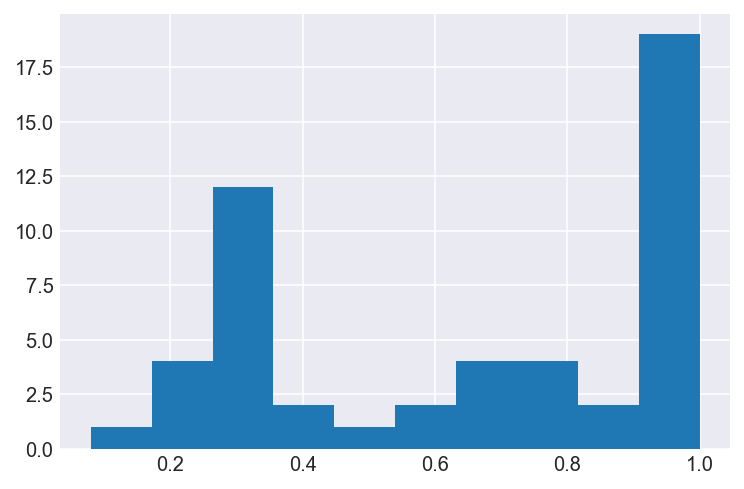

In [112]:
#histogram of participation rates for act
plt.hist(df_merge['Participation_ACT'])

In [113]:
#normalsy test for participation rates
stats.normaltest(df_merge['Participation_ACT'])

NormaltestResult(statistic=72.50510406893649, pvalue=1.8018419611696658e-16)

(array([21.,  2.,  2.,  1.,  3.,  3.,  9.,  2.,  1.,  7.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <a list of 10 Patch objects>)

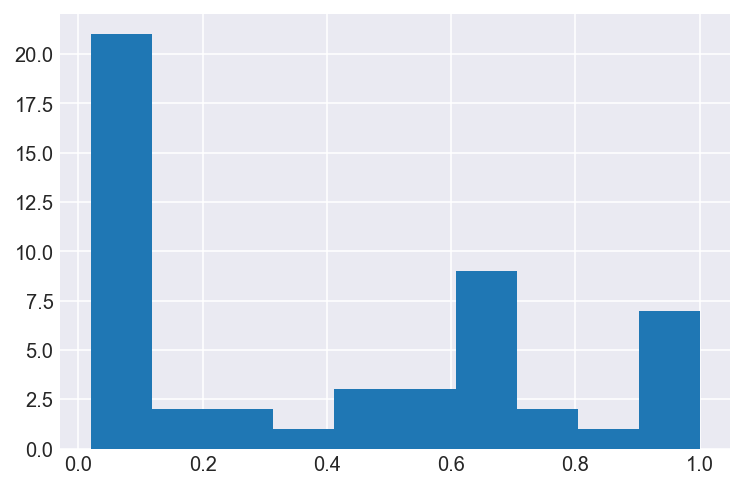

In [114]:
#histogram for participation of sat
plt.hist(df_merge['Participation_SAT'])

In [115]:
#normalsy test for participation for sat
stats.normaltest(df_merge['Participation_SAT'])

NormaltestResult(statistic=24.84401282693096, pvalue=4.02894334576706e-06)

In [116]:
#these two histograms indicate that they are not normally distributed.

##### 17. Plot the Math(s) distributions from both data sets.

NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)

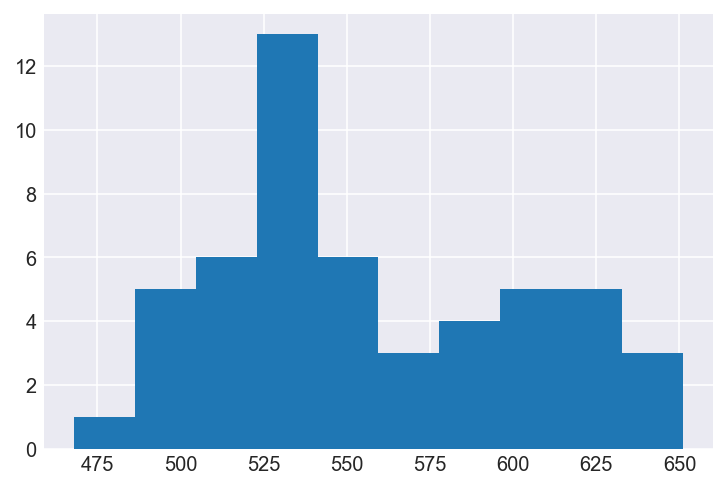

In [117]:
#plot math sat performance
plt.hist(df_merge['Math_SAT'])
stats.normaltest(df_merge['Math_SAT'])

NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)

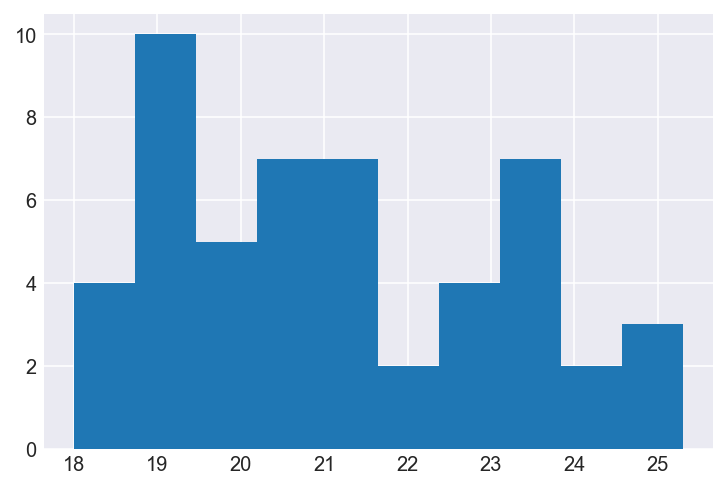

In [118]:
#plt math act performance
plt.hist(df_merge['Math_ACT'])
stats.normaltest(df_merge['Math_ACT'])

##### 18. Plot the Verbal distributions from both data sets.

NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)

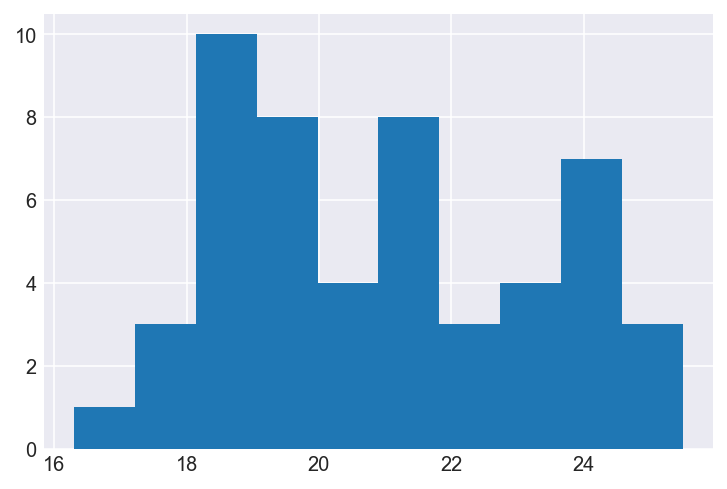

In [120]:
#plot histogram of english scores for act
plt.hist(df_merge['English_ACT'])
stats.normaltest(df_merge['English_ACT'])

NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)

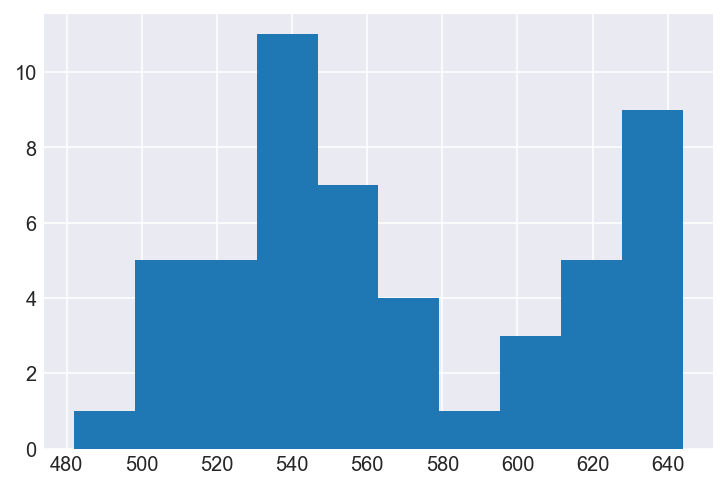

In [121]:
#plot histogram for english scores for sat 
plt.hist(df_merge['Reading_Writing_SAT'])
stats.normaltest(df_merge['Reading_Writing_SAT'])

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [1484]:
#We are assuming the data is random and that when we randomly sampled our data it is distributed normally. 

##### 20. Does this assumption hold true for any of our columns? Which?

In [1485]:
#These columns do not look normally distributed. When we test this through the p value, only one has a pvalue that is low enough but it appears to be a reverse bell curve which means it is not normally distributed.  

##### 21. Plot some scatterplots examining relationships between all variables.

In [122]:
#use sns.pairplot to determine different relationships between the data

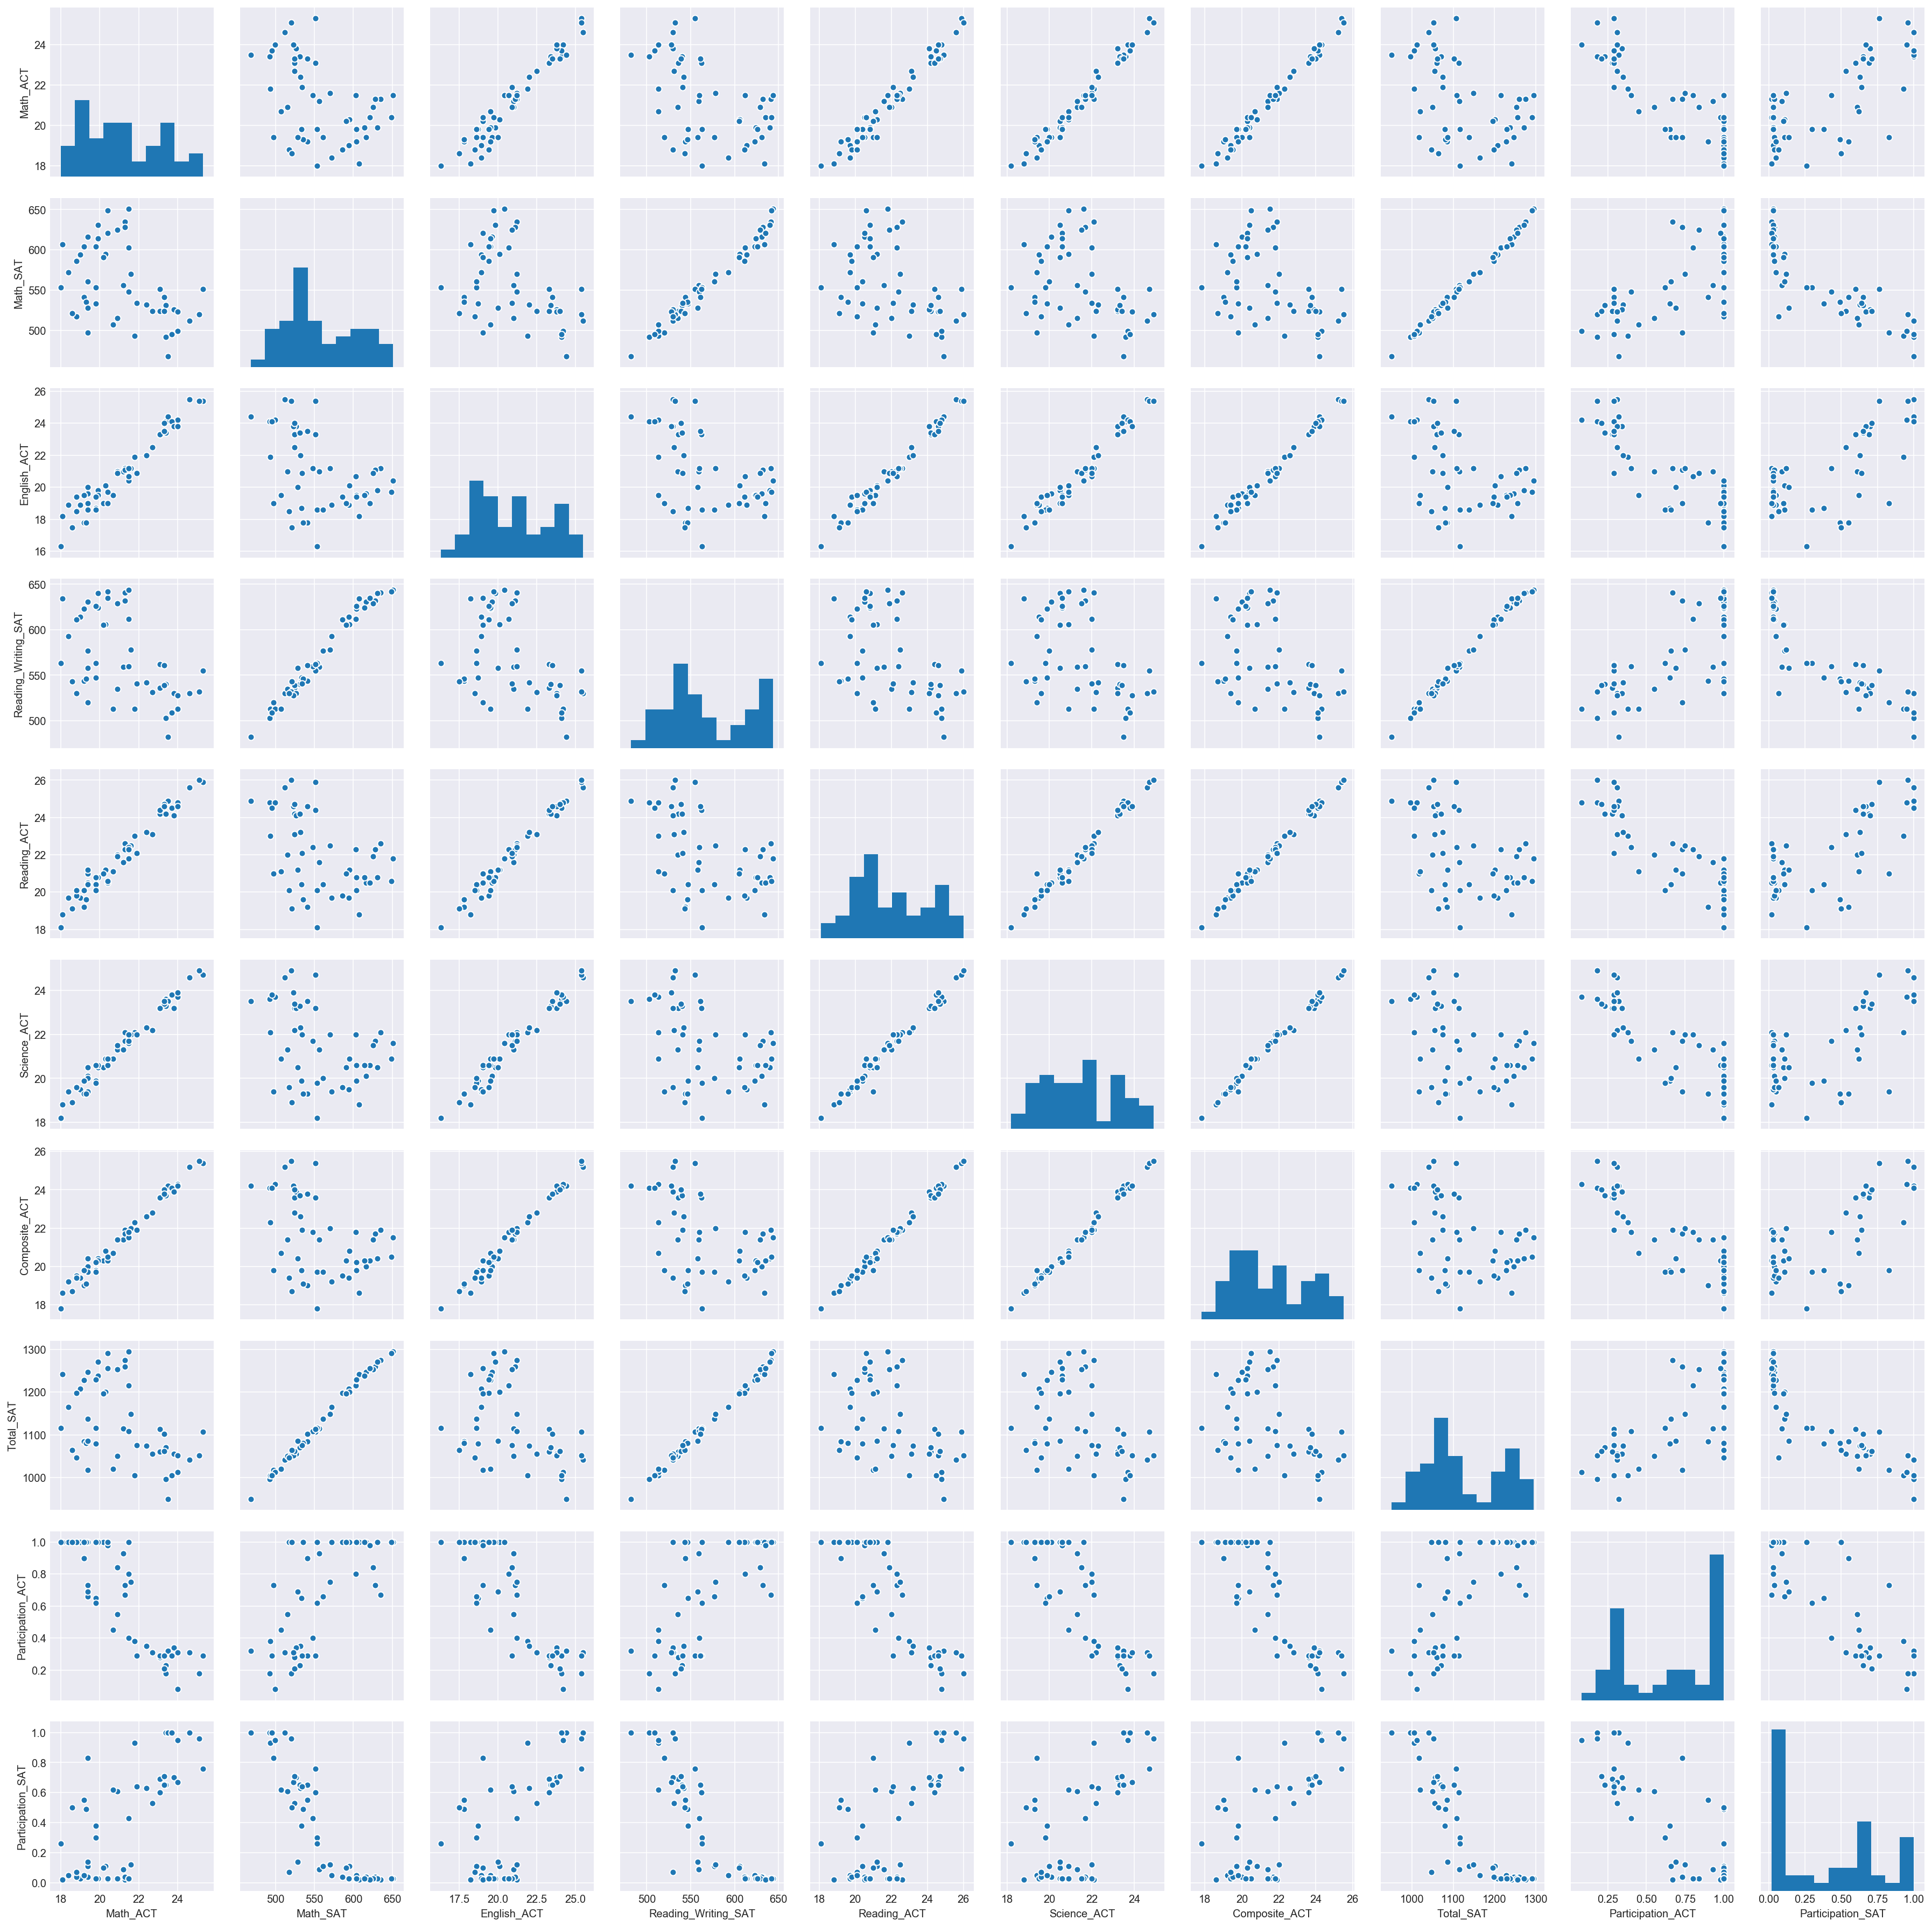

In [123]:
sns.pairplot(df_merge[['Math_ACT', 'Math_SAT', 'English_ACT', 'Reading_Writing_SAT', 'Reading_ACT', 'Science_ACT', 'Composite_ACT', 'Total_SAT', 'Participation_ACT', 'Participation_SAT']], kind='scatter')

##### 22. Are there any interesting relationships to note?

In [124]:
#definitely the most obvious and central to anylizing 
#the results is how the total sat and cumulative act 
#are correlated positively with the scores that make up
#their test english and math. This means that if a state
#did well in english/math they did well on the test overall. 
#this is a bit of a sainity check but is very important.

#Other major observations of note are how the there is 
#low correlation between SAT and ACT performance. If 
#anything the lose relationship is negative which 
#is suprising because people who do well on the ACt 
#should do well on the SAT.
#Ultimately this can be explained by the participation 
#rates. States that had low participatoin in SAT 
#performed better on the SAT than states whith high 
#participation. The same relationship applied to the ACT as well. On that note a state with higher participation on the ACT performed better on the SAT and a state with a higher participation on SAT performed better on the SAT. 

#The other key observation is how correlated the various
#scores were so highly connected. So if a state did well
#on math they also did well on english, and for act this
#also applied to science as well. it is very interesting
#how strong this correlation was which was good in meaning
#these results are not flukes. 

##### 23. Create box plots for each variable. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


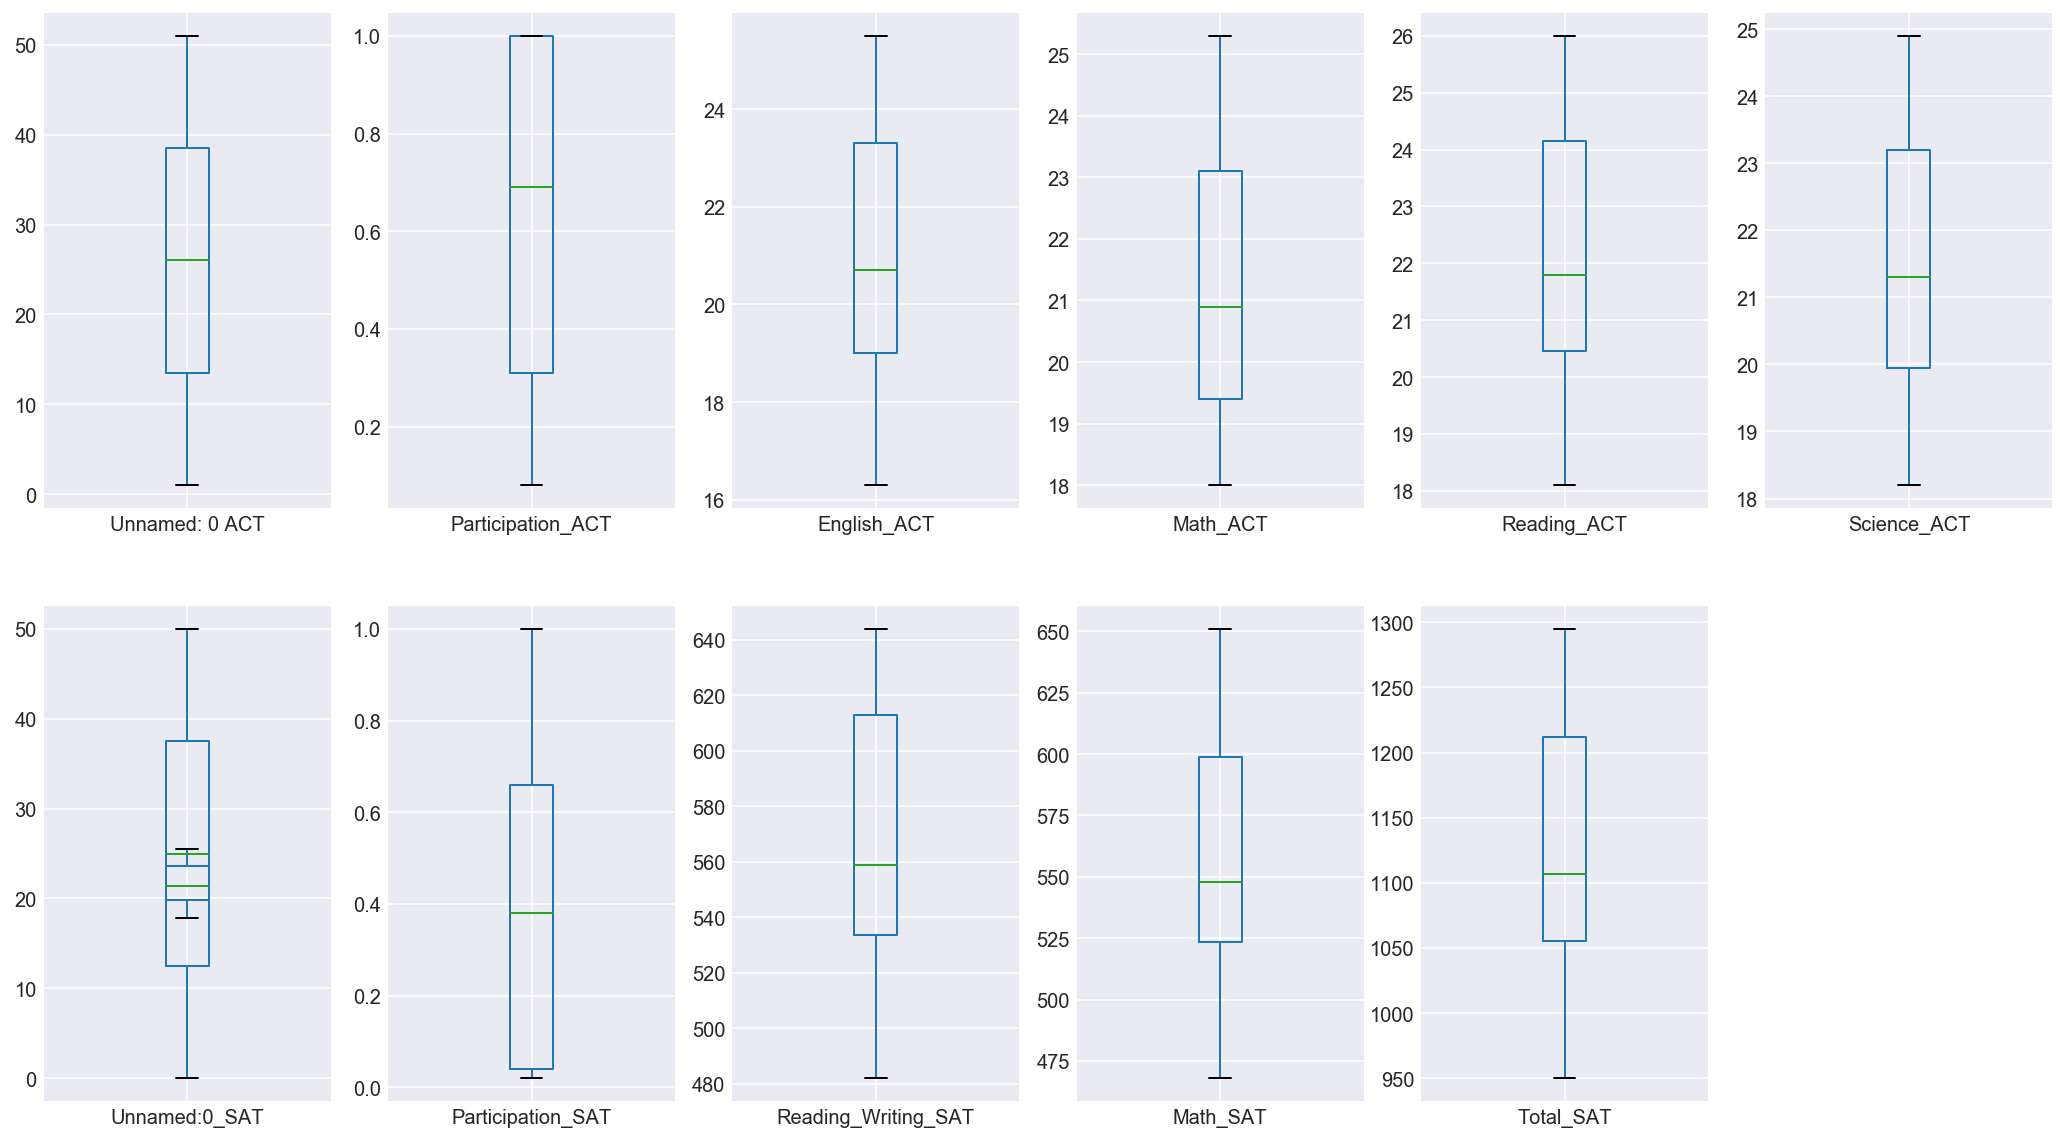

In [125]:
#boxplot for each variable

fig = plt.figure(figsize=(18, 10))
act_counter = 1
sat_counter = 7
for c in df_merge.select_dtypes("number"):
    if "ACT" in c:
        fig.add_subplot(2, 6, act_counter)
        df_merge.boxplot(column = c)
        act_counter += 1
    else:
        fig.add_subplot(2, 6, sat_counter)
        df_merge.boxplot(column = c)
        sat_counter += 1

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [127]:
#getting this linked to a usa map is a bit over my head
#but able to see the most important correlations and 
#it is facinating how strong many of these correlations
#as well

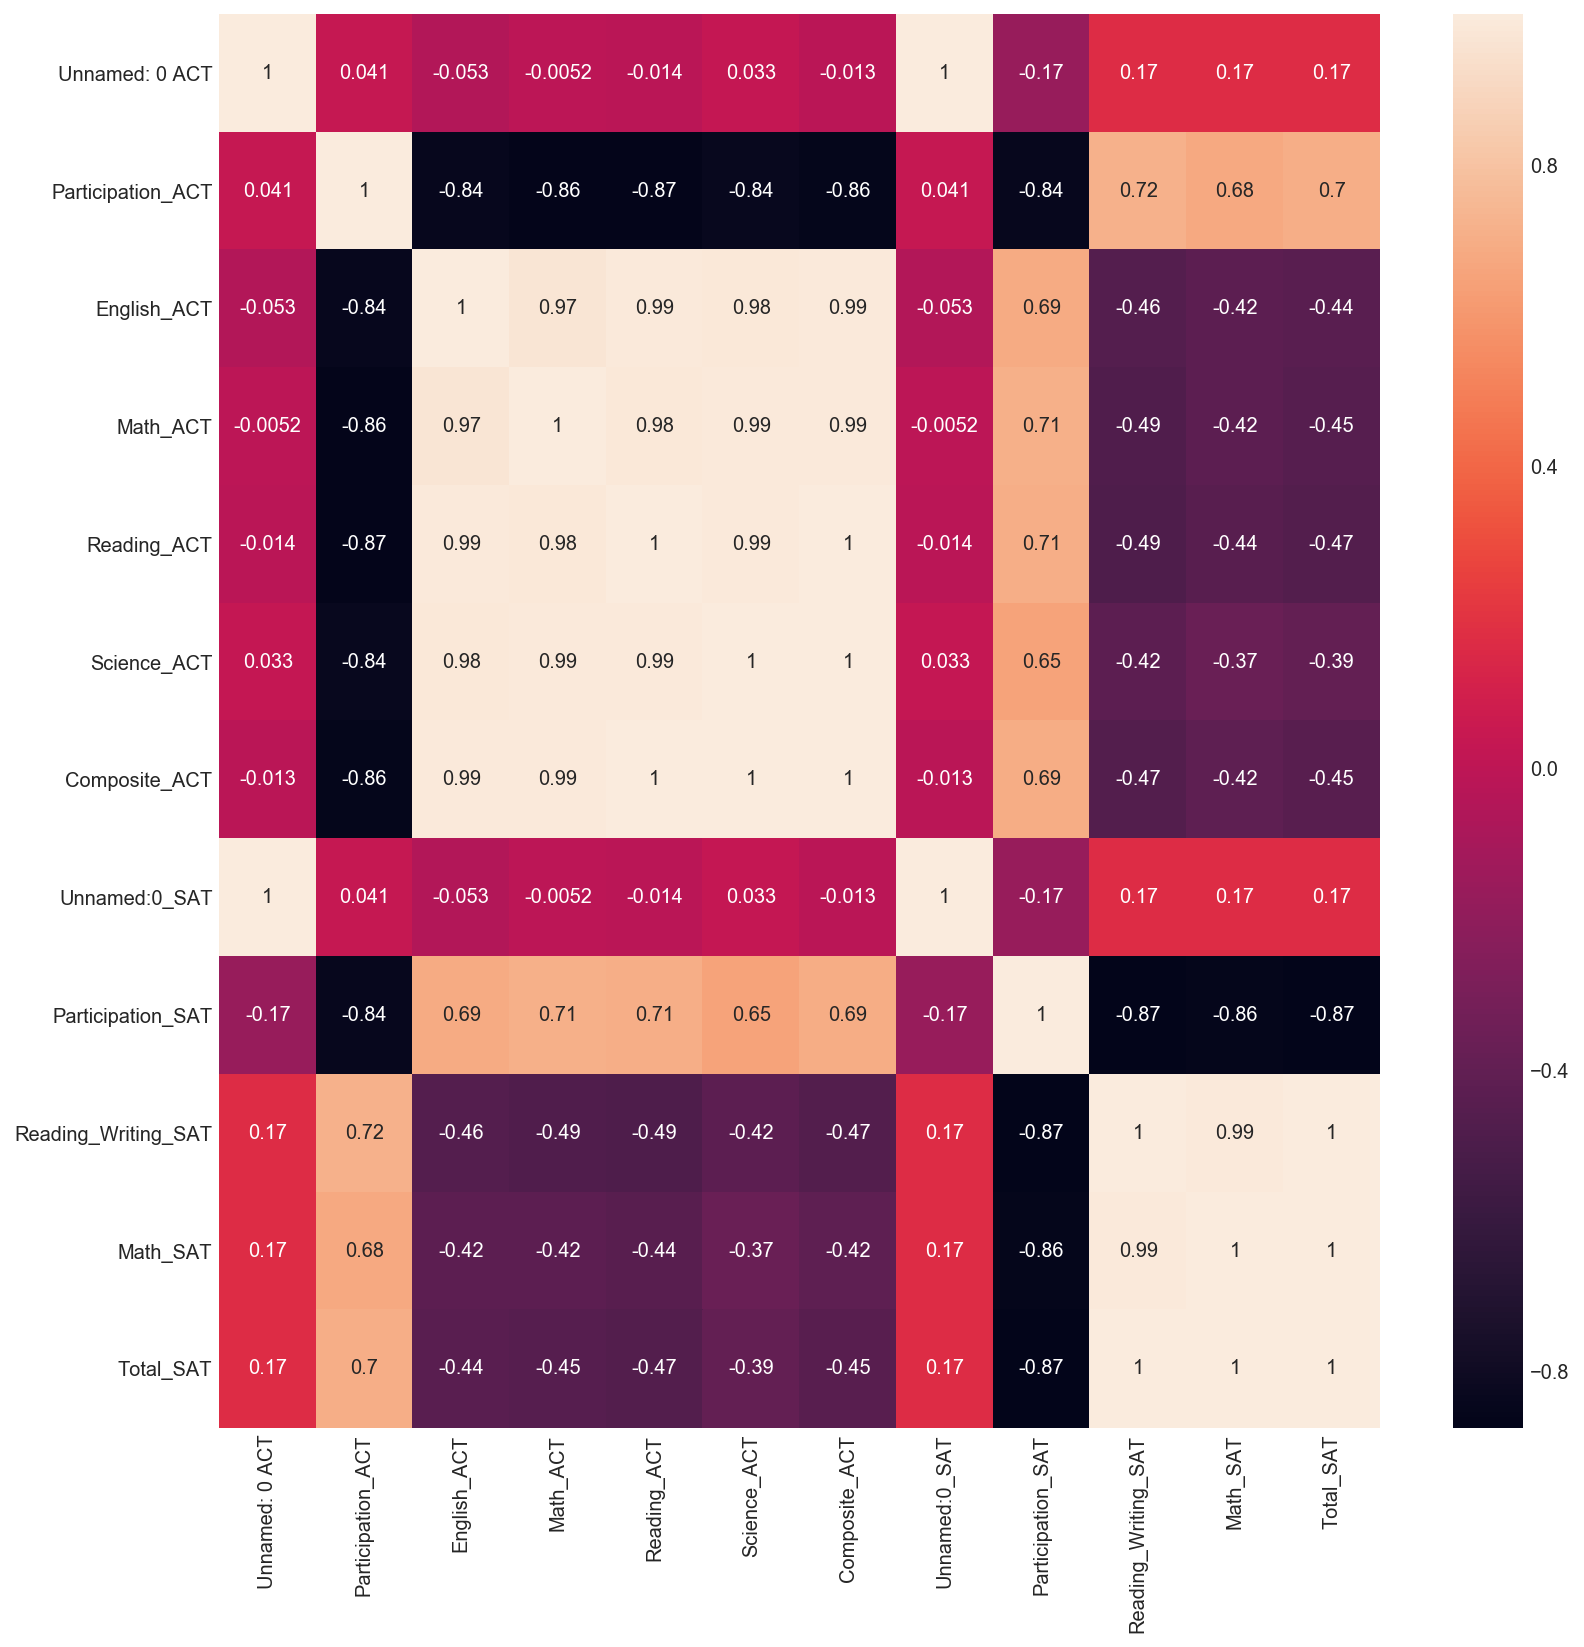

In [126]:
plt.figure(figsize=(13,13))
sns.heatmap(df_merge.corr(), annot=True)

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [128]:
df_merge.describe()

,Unnamed: 0 ACT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Unnamed:0_SAT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,25.000000,0.398039,569.117647,556.882353,1126.098039
std,14.866069,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,14.866069,0.352766,45.666901,47.121395,92.494812
min,1.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.000000,0.020000,482.000000,468.000000,950.000000
25%,13.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,12.500000,0.040000,533.500000,523.500000,1055.500000
50%,26.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,25.000000,0.380000,559.000000,548.000000,1107.000000
75%,38.500000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,37.500000,0.660000,613.000000,599.000000,1212.000000
max,51.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,50.000000,1.000000,644.000000,651.000000,1295.000000


In [129]:
#Math_ACT is not normally distributed. The mean is 20.5 and the STD is 4.177. 
#English_ACT is not normally distributed. The mean is 20.3 and the std is 4.248.
#Reading_ACT is not normally distributed. The mean is 21.2 and the std is 4.34.
#Science_ACT is normally distributed. The mean is 20.7 and the std is 4.16. I discounted the outlier in this case which made it clearly normal distribution because the outliar is the standard deviation that I added. Pvalue also is inline with the suggestion. 
#Composite_ACT is not normally distributed. The mean is 20.7 and the std is 4.24. 
#Participation_ACT is not normally distributed. Looks like a bell curve. The mean is .64 and the std is .32 which is massively large. 
#Participation_SAT is not normally distributed. I removed the outlire which is from the std that we added and it appears to be normal. The mean is .39 and the std is .34. 
#Math_SAT is not normally distributed. The average is 538 and the std is 108.5. 
#Reading_Writing_SAT is normally distributed. The average is 549.3 and std is 110.3. Pvalue aligns with this. 
#Total_SAT is normally distributed. The average was 1087.1 and the std is 2018.7. Pvalue aligns with this. 
#The standard deviations of English and Math STD almost add exactly up to the std of total. This makes sense as they cumuliatively add up to that score and depend on the same information. And the same applies for the total average relative to the average math score and average english score. 

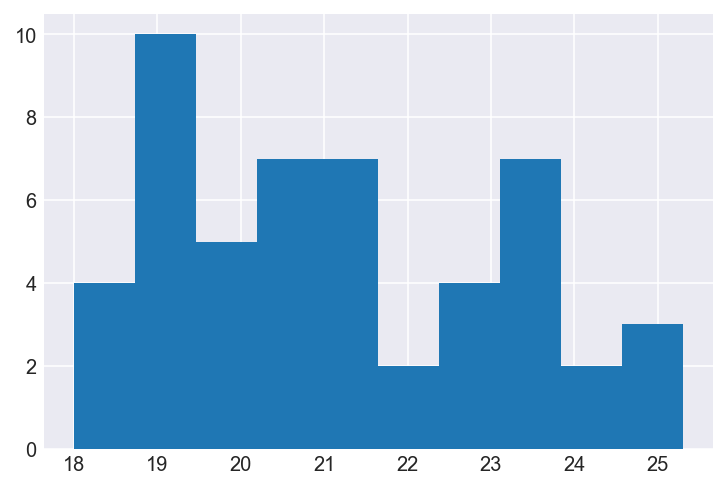

In [131]:
#histogram for math act
plt.hist(df_merge['Math_ACT']);


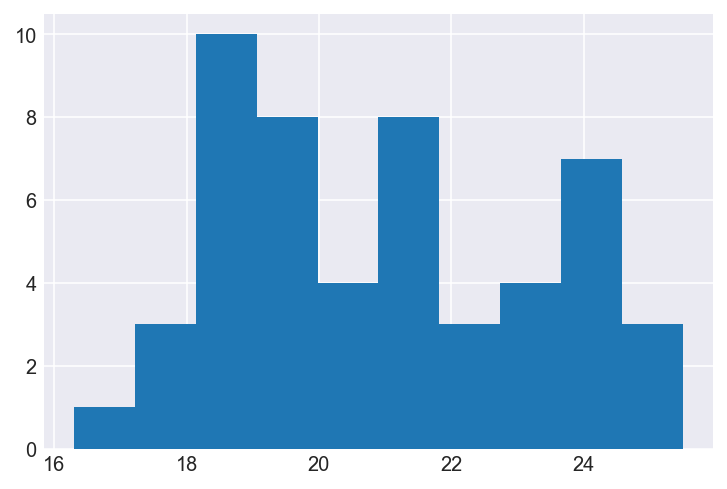

In [132]:
#histogram for english act
plt.hist(df_merge['English_ACT']);


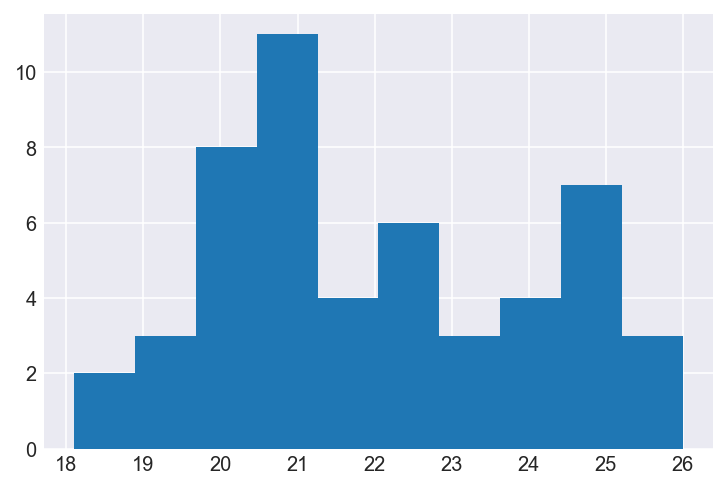

In [133]:
#histogram for reading act
plt.hist(df_merge['Reading_ACT']);

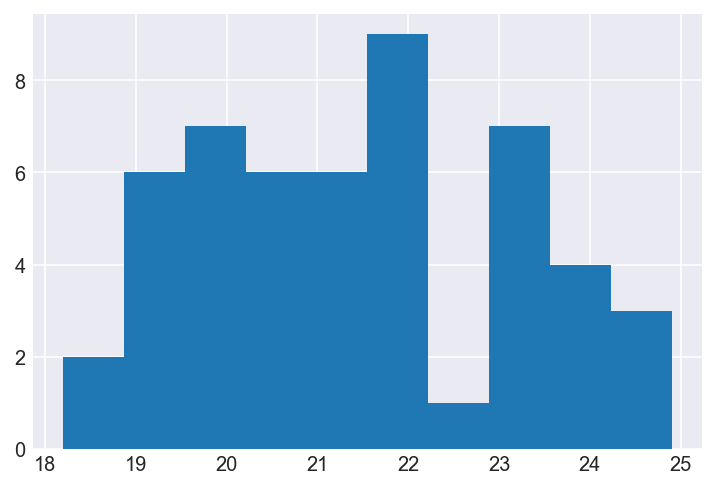

In [134]:
#science act histogram
plt.hist(df_merge['Science_ACT']);

In [137]:
#normal test for science act
stats.normaltest(df_merge['Science_ACT'])

NormaltestResult(statistic=5.501326521192357, pvalue=0.06388547443366324)

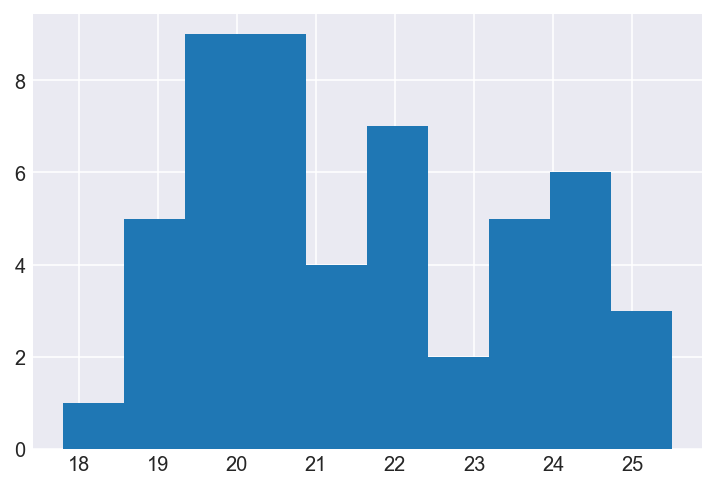

In [136]:
#histogram for composite act
plt.hist(df_merge['Composite_ACT']);

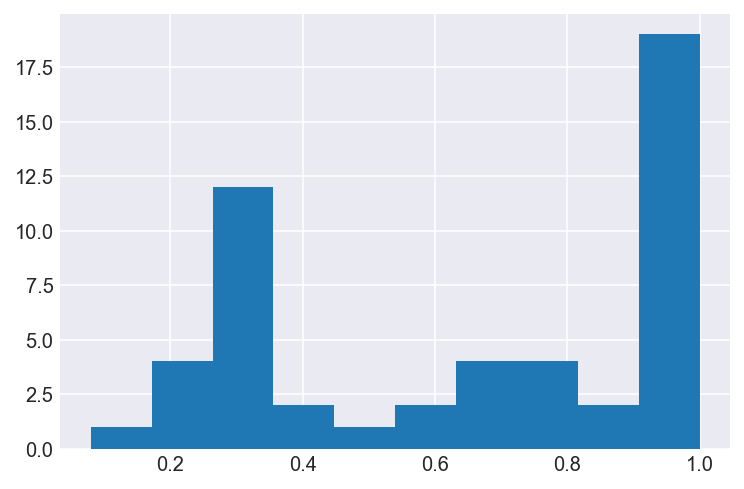

In [138]:
#participation act histogram
plt.hist(df_merge['Participation_ACT']);

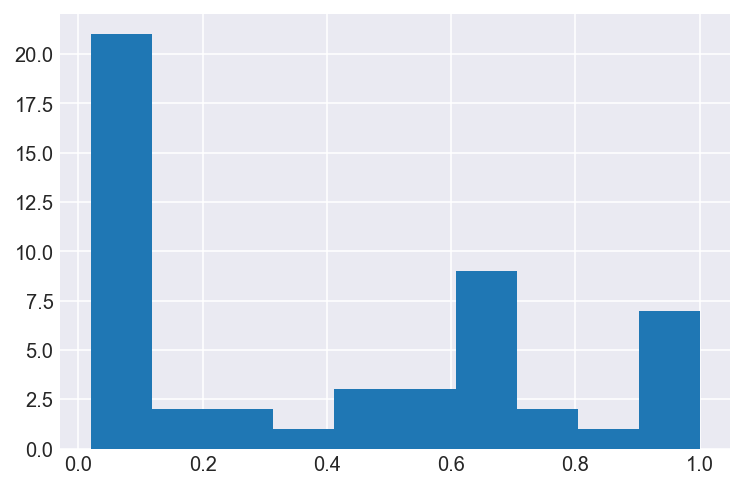

In [139]:
#participation sat histogram
plt.hist(df_merge['Participation_SAT']);

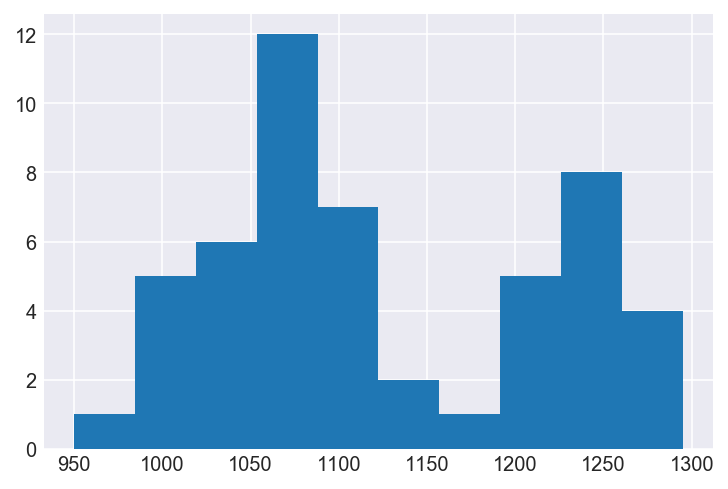

In [140]:
#total sat histogram
plt.hist(df_merge['Total_SAT']);

In [141]:
#normal test 
stats.normaltest(df_merge['Total_SAT'])

NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)

NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)

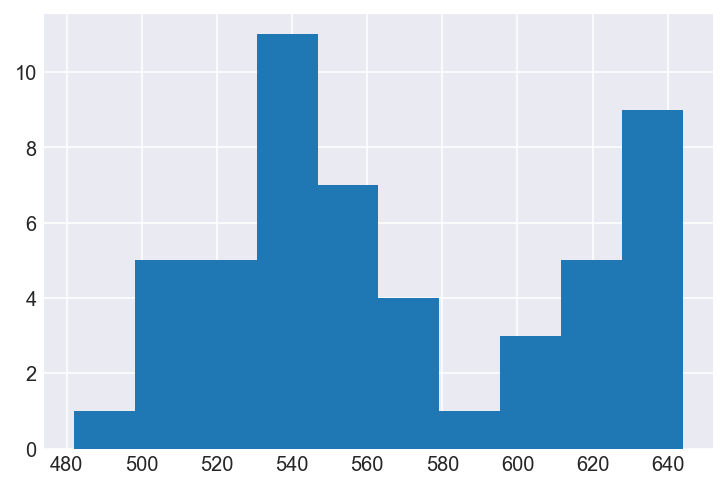

In [142]:
#reading/writing sat histogram
plt.hist(df_merge['Reading_Writing_SAT']);
stats.normaltest(df_merge['Reading_Writing_SAT'])

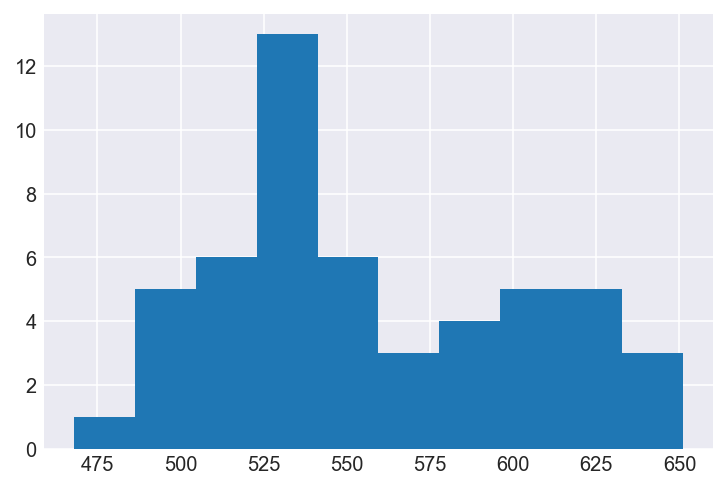

In [143]:
#math sat histogram
plt.hist(df_merge['Math_SAT']);

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

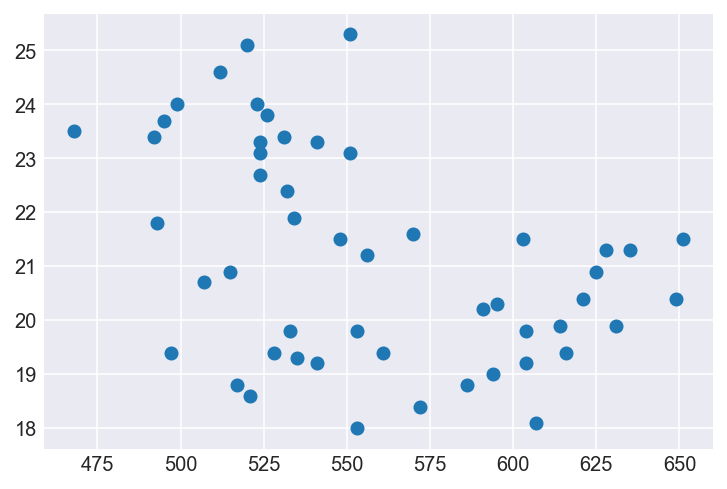

In [144]:
#math act and math sat scatter plot
plt.scatter(df_merge['Math_SAT'], df_merge['Math_ACT'])

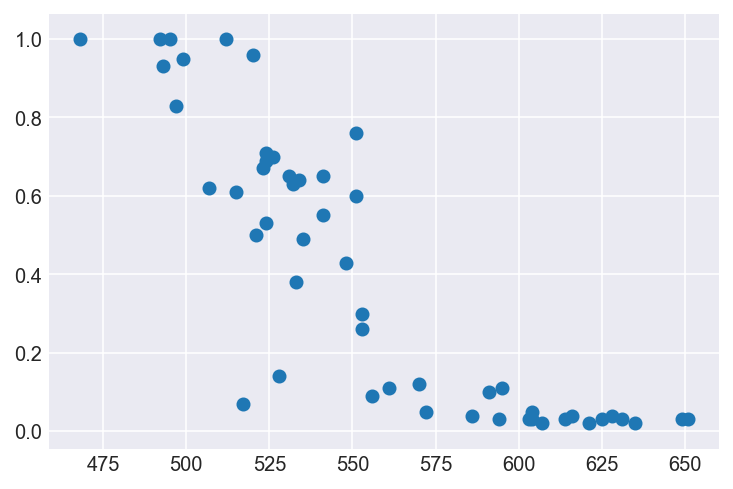

In [145]:
#math sat and participation sat scatterplot
plt.scatter(df_merge['Math_SAT'], df_merge['Participation_SAT'])

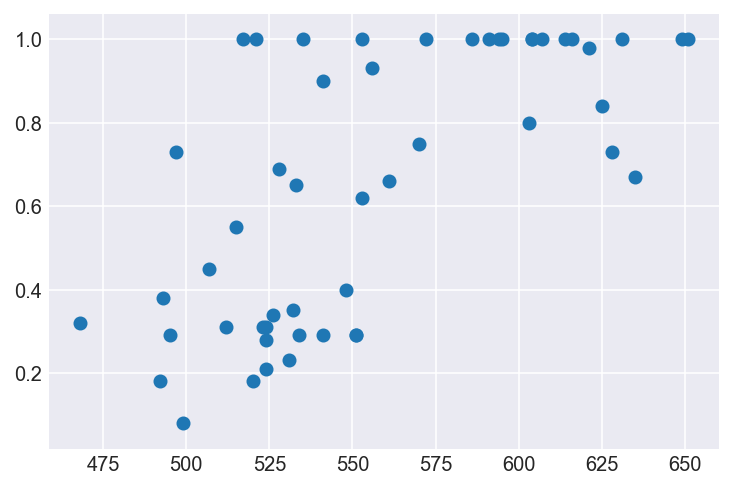

In [148]:
#math sat and participation act scatterplot
plt.scatter(df_merge['Math_SAT'], df_merge['Participation_ACT'])

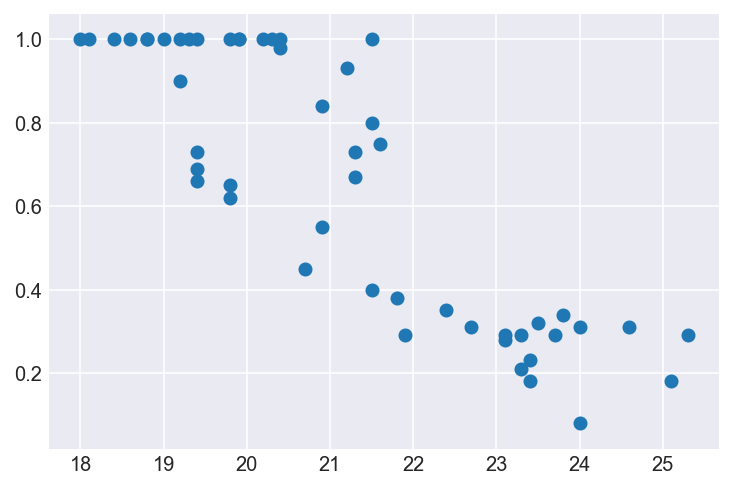

In [196]:
plt.scatter(df_merge['Math_ACT'], df_merge['Participation_ACT'])

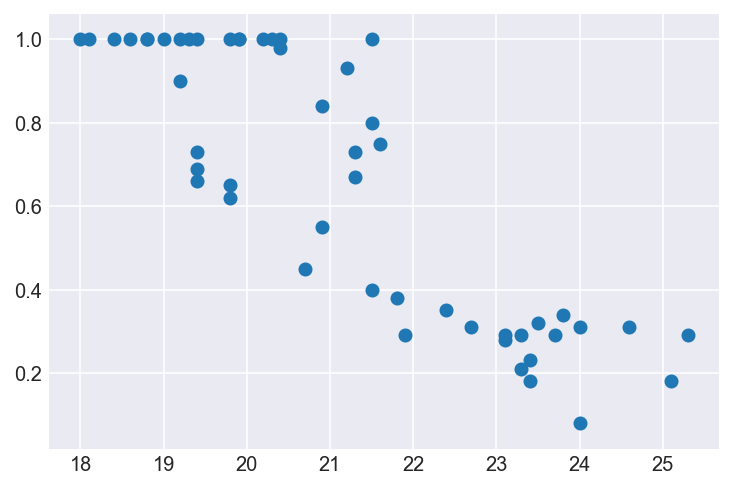

In [150]:
#math act and participatoin act scatterplot
plt.scatter(df_merge['Math_ACT'], df_merge['Participation_ACT'])

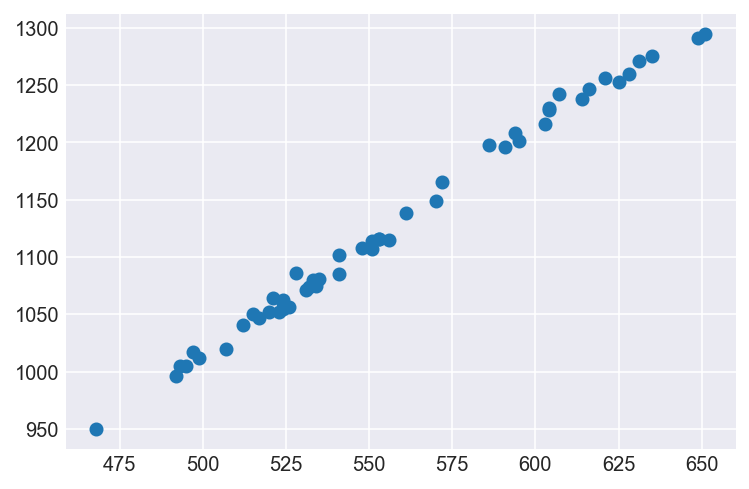

In [152]:
#math sat and total sat scatterplot
plt.scatter(df_merge['Math_SAT'], df_merge['Total_SAT'])

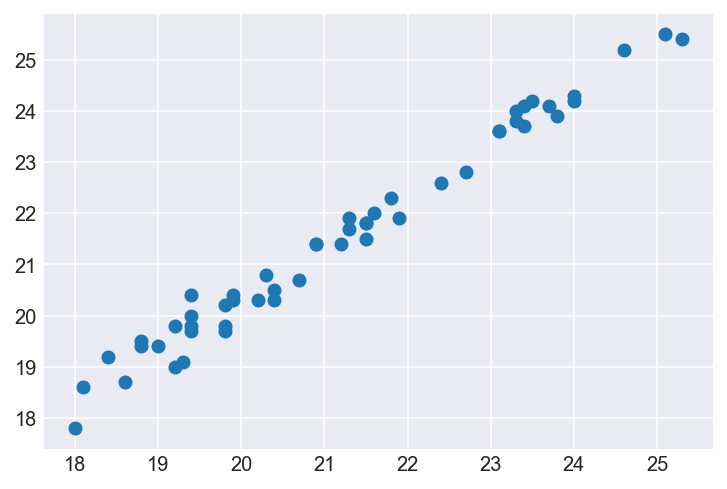

In [153]:
#math act and composite sat scatterplot
plt.scatter(df_merge['Math_ACT'], df_merge['Composite_ACT'])

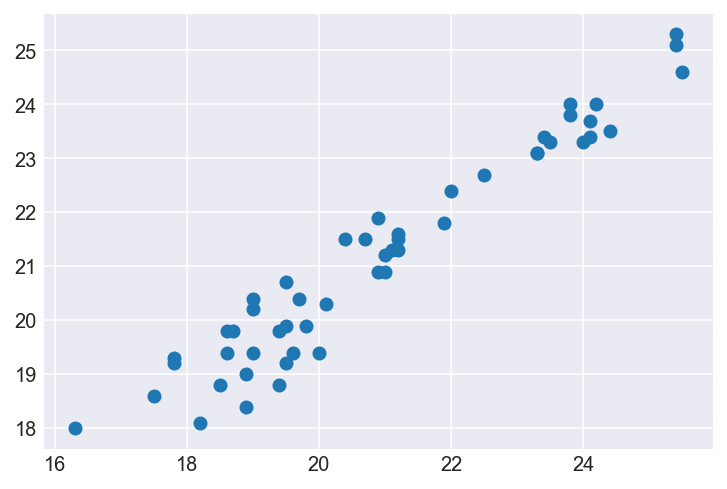

In [154]:
#english act and math act scatterplot
plt.scatter(df_merge['English_ACT'], df_merge['Math_ACT'])

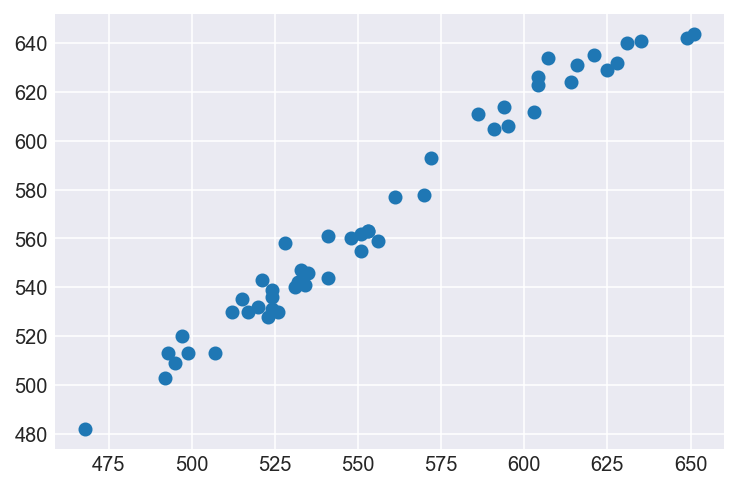

In [155]:
#math sat and reading writing sat scatterplot
plt.scatter(df_merge['Math_SAT'], df_merge['Reading_Writing_SAT'])

In [156]:
#Looking at all this information there are a lot of 
#important pieces of information. From a sainity check 
#the total for both ACT and SAT are linked linearly 
#with the English and Math scores within their respective
#tests but not linked with performance on tests outside
#their tests scope. for example sat does not apply to act.

#A bit more suprising is how linearly SAT and ACT 
#scores align when it comes to English and Math. 
#There is a direct correlation of 1 or .99 which is a 
#lot. The most intereting part of this data is the the 
#fact that participation is invertedly related to the 
#performance of people on the test. So the less people 
#in a state take the SAT the better the state did. 
#This applies to the ACt as well. The reason for this 
#is likely self selection based on income and based on 
#academic interest/ performance. People who take both 
#tests can afford both tests and have the motivation to
#take both. This certainly is not a rule and could be 
#disproven but this feels like the most likely 
#explianation. 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [157]:
import scipy.stats as stats

In [158]:
t_stat, p_value = stats.ttest_ind(df_merge['Participation_SAT'], df_merge['Participation_ACT'])

In [159]:
p_value

0.00024134203698662353

In [160]:
t_stat

-3.8085778908170544

In [162]:
p_value

0.00024134203698662353

In [163]:
Part_SAT_Mean = np.mean(df_merge['Participation_SAT'])

In [164]:
Part_SAT_Mean

0.39803921568627454

In [175]:
Part_ACT_Mean = np.mean(df_merge['Participation_ACT'])

In [178]:
#mean of the ACT. 
Part_ACT_Mean

0.6525490196078431

In [184]:
#standard error. this is the range for question 27. so
#once we have the mean this should find us both the upper
#and lower bounds.
sdr_error=(np.std(df_merge['Participation_SAT'])/ np.sqrt(53))*1.96

In [185]:
sdr_error

0.09403838643071667

In [186]:
#upper range cap within twosided 95% confidence interval. 
Upper = Part_SAT_Mean + sdr_error
Upper

0.4920776021169912

In [187]:
#lower range cap within twosided 95% confidence interval.
Lower = Part_SAT_Mean - sdr_error
Lower

0.3040008292555579

In [188]:
#Judging by the p_value I reject the nullhypothesis 
#with 95% certainty that the Participation Rate for the
#ACT and SAT are different.  

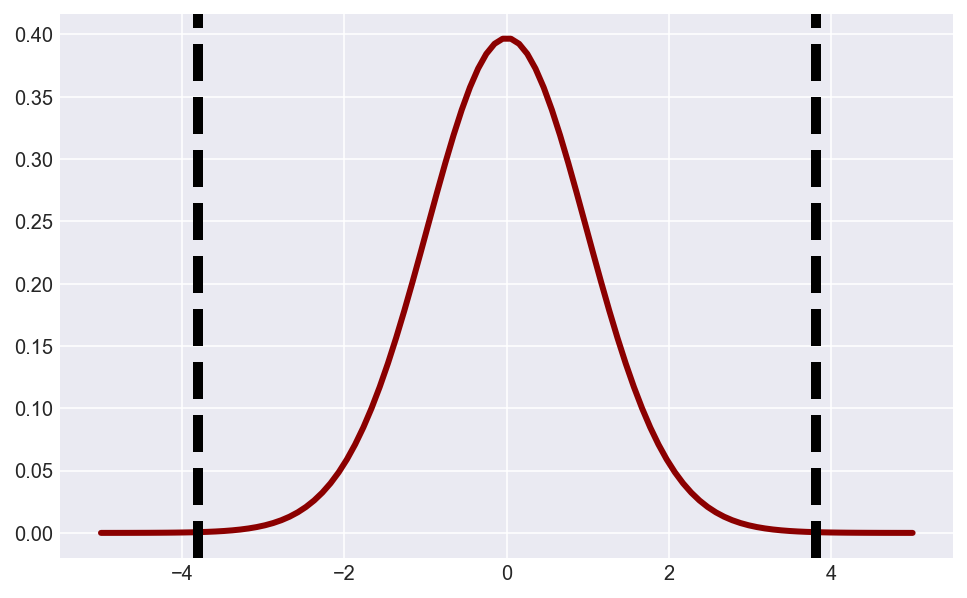

In [189]:
xpoints = np.linspace(-5,5,100)
ypoints = stats.t.pdf(xpoints, len(df_merge['Participation_ACT']))

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [190]:
#confidence ranges within the 95% confidence interval
#used from 26.

In [191]:
Lower

0.3040008292555579

In [192]:
Upper

0.4920776021169912

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [193]:
#Not really suprising. The means of SAT and ACT are 
#very likely separte and the confidence intervals only 
#confirm that. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [194]:
#It is not appropriate to on its own. The reason is 
#that the SAT and ACT scores are dicated by how many 
#people in their population take the test more than 
#the other factors. Being a binary choice, when a 
#majority of people take 1 test, a minority of people 
#take the other test. There are plenty of reasons as 
#to why I think this might be the case but to properly 
#compare the correlation of SAT and ACT Math scores, 
#a person needs to control for % of the population 
#taking the test. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [195]:
#I would say no. The relationship is pretty messed up 
#and not intuitive entirely. For things like saying
#which state is smarter this is really terrible. It 
#might have some good properties and be able to predict
#a few things here or there, but considering many 
#distribution are not normal and some of the standard 
#deviations are extremely wide I would not find it 
#overly explainitory and capable of making stistical 
#inferences/ predictions. 